# Wavelength Calibration across all detectors




Trying to Model the wavelength mapping by using all 4 detectors with gaps between each detector.

Taking code from my testing file and adapting it and investigating it further.

Used jupyter intro suggestions from - http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html

In [57]:
# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import Obtain_Telluric as obt
from Get_filenames import get_filenames

# Seaborn, useful for graphics
import seaborn as sns


# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline


In [58]:
# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting


from bokeh.plotting import figure, show, output_file, gridplot, vplot
from bokeh.models import BoxAnnotation
from bokeh.models import Range1d

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
#%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 1, 
      'axes.labelsize': 14, 
      'axes.titlesize': 16, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

In [17]:
import os
here = os.getcwd()
print(here)

C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a


#### Load data

In [18]:
#Chipnames = ["Coordinates_CRIRE.2012-04-07T00-08-29.976_1.nod.ms.norm.sum.txt", "Coordinates_CRIRE.2012-04-07T00-08-29.976_2.nod.ms.norm.sum.txt", "Coordinates_CRIRE.2012-04-07T00-08-29.976_3.nod.ms.norm.sum.txt", "Coordinates_CRIRE.2012-04-07T00-08-29.976_4.nod.ms.norm.sum.txt"]

#Coordinates files from hd30501-2b
#Chipnames = ["Coordinates_CRIRE.2012-08-06T09-42-07.888_1.nod.ms.norm.sum.txt", "Coordinates_CRIRE.2012-08-06T09-42-07.888_2.nod.ms.norm.sum.txt", "Coordinates_CRIRE.2012-08-06T09-42-07.888_3.nod.ms.norm.sum.txt", "Coordinates_CRIRE.2012-08-06T09-42-07.888_4.nod.ms.norm.sum.txt"]

#PATH = "/home/jneal/Dropbox/PhD/hd30501-Wavecal-march16/"
#PATH = "C:/Users/Jason/Dropbox/PhD/hd30501-Wavecal-march16/"




In [28]:
# Updated load in for beter calibration data
chip_num = 1
obs_num = "2a"
#ref_num = "3"
target = "HD30501-" + obs_num
#reference_target = "HD30501-"+ ref_num    # should be different from target

### Coord data
coord_path = here +"/HD30501_data/{0}/".format(obs_num)
print(coord_path)
#PATH = coord_path
#dracs_path = "C:/Users/Jason/Documents/PhD/Phd-codes/Notebooks/HD30501_data/{0}/".format(obs_num)
#dracs_path = "../HD30501_data/{0}".format(obs_num)
def get_Coordfile_name(path, chipnum):
    spliting = path.split("/")
    print(spliting)
    if spliting[-3] in spliting[-4]:
        print("Double path add -hack")
        path = path + "../../"
        print(path)
    coord_name = get_filenames(path, "Coordinates_CRIRE.*","*{}.nod.ms.norm.sum*".format(chipnum))
    return path + coord_name[0]

C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a/HD30501_data/2a/


Need to load in the data and unpack all the parameters from each of the detectors for this observation.

The data contains the Pixel value, height and FWHM value of the observation gaussians and the wavelength, height and fwhm of the tapas gaussian line.

Will use these to create a mapping of pixels to wavelength.

In [29]:
#pix1, pxl_depth1, pxl_fwhm1, wlen1, wl_depth1, wl_fwhm1 = np.loadtxt(PATH+Chipnames[0], skiprows=1, unpack=True)
#pix2, pxl_depth2, pxl_fwhm2, wlen2, wl_depth2, wl_fwhm2 = np.loadtxt(PATH+Chipnames[1], skiprows=1, unpack=True)
#pix3, pxl_depth3, pxl_fwhm3, wlen3, wl_depth3, wl_fwhm3 = np.loadtxt(PATH+Chipnames[2], skiprows=1, unpack=True)
#pix4, pxl_depth4, pxl_fwhm4, wlen4, wl_depth4, wl_fwhm4 = np.loadtxt(PATH+Chipnames[3], skiprows=1, unpack=True)

pix1, pxl_depth1, pxl_fwhm1, wlen1, wl_depth1, wl_fwhm1 = np.loadtxt(get_Coordfile_name(coord_path, 1), skiprows=1, unpack=True)
pix2, pxl_depth2, pxl_fwhm2, wlen2, wl_depth2, wl_fwhm2 = np.loadtxt(get_Coordfile_name(coord_path, 2), skiprows=1, unpack=True)
pix3, pxl_depth3, pxl_fwhm3, wlen3, wl_depth3, wl_fwhm3 = np.loadtxt(get_Coordfile_name(coord_path, 3), skiprows=1, unpack=True)
pix4, pxl_depth4, pxl_fwhm4, wlen4, wl_depth4, wl_fwhm4 = np.loadtxt(get_Coordfile_name(coord_path, 4), skiprows=1, unpack=True)


['C:\\Users\\Jason\\Documents\\PhD\\Phd-codes\\Notebooks\\HD30501_data\\2a', 'HD30501_data', '2a', '']
Double path add -hack
C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a/HD30501_data/2a/../../
['C:\\Users\\Jason\\Documents\\PhD\\Phd-codes\\Notebooks\\HD30501_data\\2a', 'HD30501_data', '2a', '']
Double path add -hack
C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a/HD30501_data/2a/../../
['C:\\Users\\Jason\\Documents\\PhD\\Phd-codes\\Notebooks\\HD30501_data\\2a', 'HD30501_data', '2a', '']
Double path add -hack
C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a/HD30501_data/2a/../../
['C:\\Users\\Jason\\Documents\\PhD\\Phd-codes\\Notebooks\\HD30501_data\\2a', 'HD30501_data', '2a', '']
Double path add -hack
C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a/HD30501_data/2a/../../


### Arrange pixels with gaps

In [30]:
# Pixel gaps Brogi et al 2015
Fixed_Gap0 = 0
Fixed_Gap1 = 282
Fixed_Gap2 = 278
Fixed_Gap3 = 275

Chip1_gap = Fixed_Gap0
Chip2_gap = Fixed_Gap0 + Fixed_Gap1
Chip3_gap = Fixed_Gap0 + Fixed_Gap1 + Fixed_Gap2
Chip4_gap = Fixed_Gap0 + Fixed_Gap1 + Fixed_Gap2 + Fixed_Gap3

#pixel space
max_pixel = 4*1024 + Chip4_gap
pixel_span = range(1, max_pixel)

Test_pxl1 = [pxl + Chip1_gap for pxl in pix1] 
Test_pxl2 = [pxl + 1*1024 + Chip2_gap for pxl in pix2]
Test_pxl3 = [pxl + 2*1024 + Chip3_gap for pxl in pix3]
Test_pxl4 = [pxl + 3*1024 + Chip4_gap for pxl in pix4]
Test_wl1 = [wl for wl in wlen1]
Test_wl2 = [wl for wl in wlen2]
Test_wl3 = [wl for wl in wlen3]
Test_wl4 = [wl for wl in wlen4]


### Indivudal chip fits with polyfit

In [31]:
# Fit to the individual chips
order = 2
wl_map1 = np.polyfit(Test_pxl1, Test_wl1, order)
print("wl_map params 1\t", wl_map1)
wlvals1 = np.polyval(wl_map1, pixel_span) 

wl_map2 = np.polyfit(Test_pxl2, Test_wl2, order)
print("wl_map params 2\t", wl_map2)
wlvals2 = np.polyval(wl_map2, pixel_span) 

wl_map3 = np.polyfit(Test_pxl3, Test_wl3, order)
print("wl_map params 3\t", wl_map3)
wlvals3 = np.polyval(wl_map3, pixel_span) 

wl_map4 = np.polyfit(Test_pxl4, Test_wl4, order)
print("Wl map params 4\t", wl_map4)
wlvals4 = np.polyval(wl_map4, pixel_span) 

wl_map params 1	 [ -1.50500100e-07   1.15995030e-02   2.11186756e+03]
wl_map params 2	 [ -1.49603271e-07   1.15792228e-02   2.11198590e+03]
wl_map params 3	 [ -1.84818442e-07   1.17475770e-02   2.11176745e+03]
Wl map params 4	 [ -1.57439134e-07   1.15160995e-02   2.11225301e+03]


#### Combining all 4 detectors and doing a combined fit

In [32]:
# Fit to combined data
Combined_pixels = Test_pxl1 + Test_pxl2 + Test_pxl3 + Test_pxl4
Combined_wls = Test_wl1 + Test_wl2 + Test_wl3 + Test_wl4
#Need to change to have same treatment of data
#Combined_pxls = np.concatenate((pix1, pix2 + 1*1024, pix3 + 2*1024, pix4 + 3*1024))
#Combined_wls = np.concatenate((wlen1, wlen2, wlen3, wlen4))

# Fit combined pixel values
Combined_map = np.polyfit(Combined_pixels, Combined_wls, order)
print("wl_map params Combiend\t", Combined_map)
Combined_vals = np.polyval(Combined_map, pixel_span) 


wl_map params Combiend	 [ -1.80300549e-07   1.17153658e-02   2.11182218e+03]


### Plot the data

In [33]:
#plt.subplot(211)
plt.plot(Test_pxl1, Test_wl1, "bo", label="1")
plt.plot(Test_pxl2, Test_wl2, "ro", label="2")
plt.plot(Test_pxl3, Test_wl3, "go", label="3")
plt.plot(Test_pxl4, Test_wl4, "mo", label="4")
plt.ylim([min(Test_wl1), max(Test_wl4)])
ax1 = plt.gca()
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xlabel("Pixel Position")
plt.ylabel("Wavelength")
plt.ylim([2100,2200])
#plt.legend()

# Add the fit maps
plt.plot(pixel_span, wlvals1, 'b', label="Chip1")
plt.plot(pixel_span, wlvals2, 'r', label="Chip2")
plt.plot(pixel_span, wlvals3, 'g', label="Chip3")
plt.plot(pixel_span, wlvals4, 'm', label="Chip4")
plt.plot(pixel_span, Combined_vals, 'k', label="Combined")

plt.legend(loc='best')


# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

NameError: name 'Gap1' is not defined

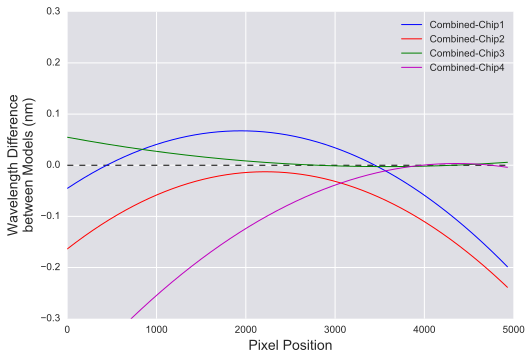

In [34]:
# Compare differences in wavelength
#plt.subplot(212)
plt.plot(pixel_span, np.zeros_like(pixel_span), "k--", label = "")
plt.plot(pixel_span, Combined_vals-wlvals1, 'b', label = "Combined-Chip1")
plt.plot(pixel_span, Combined_vals-wlvals2, 'r', label = "Combined-Chip2")
plt.plot(pixel_span, Combined_vals-wlvals3, 'g', label = "Combined-Chip3")
plt.plot(pixel_span, Combined_vals-wlvals4, 'm', label = "Combined-Chip4")
plt.xlabel("Pixel Position")
plt.ylabel("Wavelength Difference\nbetween Models (nm)")
plt.legend(loc=0)
ax1 = plt.gca()
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
plt.ylim([-0.3,0.3])

# Mark Chip positions
linepos = [0, 1024, 1024+Gap1, 2*1024+Gap1, 2*1024+Gap1+Gap2, 3*1024+Gap1+Gap2, 3*1024+Gap1+Gap2+Gap3, 4*1024+Gap1+Gap2+Gap3]
plt.vlines(linepos, -1, 1)

#plt.show()

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

# LmFit with Variable Detector Gaps

In [43]:
from lmfit import minimize, Parameters
import lmfit

Create the residual functions to minimize

In [44]:
def add_pixel_gaps(pixels, Gap1, Gap2, Gap3):
    new_pixels = np.array(pixels)
    chipmap4 = (new_pixels > 3*1024) * (new_pixels < 4*1024)
    chipmap3 = (new_pixels > 2*1024) * (new_pixels < 3*1024)
    chipmap2 = (new_pixels > 1*1024) * (new_pixels < 2*1024)
    new_pixels += Gap3*chipmap4 
    new_pixels += Gap2*chipmap3 
    new_pixels += Gap1*chipmap2  
    return new_pixels

def residual(params, pixels, wl_data):
    # Polynomial of form q*x**2 + m*x+b
    q = params["q"].value
    m = params["m"].value
    b = params["b"].value
    Gap1 = params["Gap1"].value
    Gap2 = params["Gap2"].value
    Gap3 = params["Gap3"].value
    
    # Change spacing to add pixel gaps to chip pixel numbering
    #new_pixels = np.array(pixels)
    #chipmap4 = (new_pixels > 3*1024) * (new_pixels < 4*1024)
    ##chipmap4 = new_pixels.all(new_pixels > 3*1024 and new_pixels < 4*1024)
    #chipmap3 = (new_pixels > 2*1024) * (new_pixels < 3*1024)
    #chipmap2 = (new_pixels > 1*1024) * (new_pixels < 2*1024)
    #new_pixels += Gap3*chipmap4 
    #new_pixels += Gap2*chipmap3 
    #new_pixels += Gap1*chipmap2  
    new_pixels = add_pixel_gaps(pixels, Gap1, Gap2, Gap3)
    
    model = q*new_pixels**2 + m*new_pixels + b
    
    return (wl_data - model) 

arranging the data

In [45]:
# USE same data as above
#pix1, pxl_depth1, pxl_fwhm1, wlen1, wl_depth1, wl_fwhm1 = np.loadtxt(PATH+Chipnames[0], skiprows=1, unpack=True)
#pix2, pxl_depth2, pxl_fwhm2, wlen2, wl_depth2, wl_fwhm2 = np.loadtxt(PATH+Chipnames[1], skiprows=1, unpack=True)
#pix3, pxl_depth3, pxl_fwhm3, wlen3, wl_depth3, wl_fwhm3 = np.loadtxt(PATH+Chipnames[2], skiprows=1, unpack=True)
#pix4, pxl_depth4, pxl_fwhm4, wlen4, wl_depth4, wl_fwhm4 = np.loadtxt(PATH+Chipnames[3], skiprows=1, unpack=True)

pix1, pxl_depth1, pxl_fwhm1, wlen1, wl_depth1, wl_fwhm1 = np.loadtxt(get_Coordfile_name(coord_path, 1), skiprows=1, unpack=True)
pix2, pxl_depth2, pxl_fwhm2, wlen2, wl_depth2, wl_fwhm2 = np.loadtxt(get_Coordfile_name(coord_path, 2), skiprows=1, unpack=True)
pix3, pxl_depth3, pxl_fwhm3, wlen3, wl_depth3, wl_fwhm3 = np.loadtxt(get_Coordfile_name(coord_path, 3), skiprows=1, unpack=True)
pix4, pxl_depth4, pxl_fwhm4, wlen4, wl_depth4, wl_fwhm4 = np.loadtxt(get_Coordfile_name(coord_path, 4), skiprows=1, unpack=True)

Test_pxl1 = [pxl for pxl in pix1] 
Test_pxl2 = [pxl + 1*1024 for pxl in pix2]
Test_pxl3 = [pxl + 2*1024 for pxl in pix3]
Test_pxl4 = [pxl + 3*1024 for pxl in pix4]
Test_wl1 = [wl for wl in wlen1]
Test_wl2 = [wl for wl in wlen2]
Test_wl3 = [wl for wl in wlen3]
Test_wl4 = [wl for wl in wlen4]

#Combined_pxls_no_gaps = np.concatenate((pix1, pix2 + 1*1024, pix3 + 2*1024, pix4 + 3*1024))
Combined_pxls = np.concatenate((pix1, pix2 + 1*1024, pix3 + 2*1024, pix4 + 3*1024))
Combined_wls = np.concatenate((wlen1, wlen2, wlen3, wlen4))
Combined_pxl_depths = np.concatenate((pxl_depth1, pxl_depth2, pxl_depth3, pxl_depth4))


['C:\\Users\\Jason\\Documents\\PhD\\Phd-codes\\Notebooks\\HD30501_data\\2a', 'HD30501_data', '2a', '']
Double path add -hack
C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a/HD30501_data/2a/../../
['C:\\Users\\Jason\\Documents\\PhD\\Phd-codes\\Notebooks\\HD30501_data\\2a', 'HD30501_data', '2a', '']
Double path add -hack
C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a/HD30501_data/2a/../../
['C:\\Users\\Jason\\Documents\\PhD\\Phd-codes\\Notebooks\\HD30501_data\\2a', 'HD30501_data', '2a', '']
Double path add -hack
C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a/HD30501_data/2a/../../
['C:\\Users\\Jason\\Documents\\PhD\\Phd-codes\\Notebooks\\HD30501_data\\2a', 'HD30501_data', '2a', '']
Double path add -hack
C:\Users\Jason\Documents\PhD\Phd-codes\Notebooks\HD30501_data\2a/HD30501_data/2a/../../


Set up inital parameters


In [46]:
params = Parameters()
params.add('q', value=0.0000001)
params.add('m', value=0.01)
params.add('b', value=2110)
params.add('Gap1', value=283)
params.add('Gap2', value=278+283)
params.add('Gap3', value=275+278+283)

Do the minimization

In [47]:
out = minimize(residual, params, args=(Combined_pxls, Combined_wls))
outreport = lmfit.fit_report(out)
print(outreport)

[[Fit Statistics]]
    # function evals   = 24
    # data points      = 66
    # variables        = 6
    chi-square         = 0.004
    reduced chi-square = 0.000
    Akaike info crit   = -631.263
    Bayesian info crit = -618.126
[[Variables]]
    q:     -1.6784e-07 +/- 1.16e-09 (0.69%) (init= 1e-07)
    m:      0.01163064 +/- 6.40e-06 (0.06%) (init= 0.01)
    b:      2111.85701 +/- 0.003416 (0.00%) (init= 2110)
    Gap1:   290.907998 +/- 0.570859 (0.20%) (init= 283)
    Gap2:   570.335449 +/- 0.873173 (0.15%) (init= 561)
    Gap3:   844.265914 +/- 1.199130 (0.14%) (init= 836)
[[Correlations]] (unreported correlations are <  0.100)
    C(m, b)                      = -0.892 
    C(Gap2, Gap3)                =  0.884 
    C(q, m)                      = -0.877 
    C(Gap1, Gap2)                =  0.797 
    C(m, Gap1)                   = -0.791 
    C(m, Gap2)                   = -0.755 
    C(q, b)                      =  0.753 
    C(b, Gap2)                   =  0.636 
    C(b, Gap1)

In [48]:
lmfit_Combined_map = [out.params["q"].value, out.params["m"].value, out.params["b"].value]
Variable_Gap1_fit = out.params["Gap1"].value
Variable_Gap2_fit = out.params["Gap2"].value
Variable_Gap3_fit = out.params["Gap3"].value


print("lmfit combined params", Combined_map)
# Individual gaps

print("Gap1 individual", Variable_Gap1_fit)
print("Gap2 individual", Variable_Gap2_fit-Variable_Gap1_fit)
print("Gap3 individual", Variable_Gap3_fit-Variable_Gap2_fit)

lmfit combined params [ -1.80300549e-07   1.17153658e-02   2.11182218e+03]
Gap1 individual 290.907998142
Gap2 individual 279.427450862
Gap3 individual 273.930465637


### Plot the solutions

In [49]:
Fitted_pixels = add_pixel_gaps(Combined_pxls, Variable_Gap1_fit, Variable_Gap2_fit, Variable_Gap3_fit)


plt.plot(Fitted_pixels, residual(out.params, Combined_pxls, Combined_wls) + Combined_wls, 'r')
plt.plot(Fitted_pixels, Combined_wls, "go")
plt.ylabel("Wavelength (nm)")
plt.xlabel("Pixels with Fitted Gaps")

# Mark Chip positions
linepos = [0, 1024, 1024+Variable_Gap1_fit, 2*1024+Variable_Gap1_fit, 2*1024+Variable_Gap2_fit, 3*1024+Variable_Gap2_fit, 3*1024+Variable_Gap3_fit, 4*1024+Variable_Gap3_fit]
plt.vlines(linepos, 2110, 2170)
plt.ylim([2100,2170])

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

In [80]:
# Bokeh Plot
    
p = figure(width=600, height=300)

p.line(Fitted_pixels, residual(out.params, Combined_pxls, Combined_wls) + Combined_wls, line_color="black")
p.circle(Fitted_pixels, Combined_wls, fill_color = "red", line_color="black", radius=30)

gap_starts =  [1024, 2*1024+Variable_Gap1_fit, 3*1024+Variable_Gap2_fit]
gap_ends = [1024+Variable_Gap1_fit, 2*1024+Variable_Gap2_fit, 3*1024+Variable_Gap3_fit]
Boxes = [BoxAnnotation(plot=p, left=start, right=end, fill_alpha=0.3, fill_color="yellow") for start, end in zip(gap_starts, gap_ends)]
p.renderers.extend(Boxes)
    
# Mark Chip positions
#linepos = [0, 1024, 1024+Variable_Gap1_fit, 2*1024+Variable_Gap1_fit, 2*1024+Variable_Gap2_fit, 3*1024+Variable_Gap2_fit, 3*1024+Variable_Gap3_fit, 4*1024+Variable_Gap3_fit]
#plt.vlines(linepos, 2110, 2170)
#plt.ylim([2100,2170])

p.title = "Wavelenght Mapping"
p.title_text_font_size = "14pt"
p.yaxis.axis_label = 'Wavelength (nm)'
p.yaxis.axis_label_text_font_size = "12pt"
p.xaxis.axis_label = 'Pixel Position'
p.xaxis.axis_label_text_font_size = "12pt"
#s3.legend.location = "bottom_right"
#s3.legend.border_line_color = None

show(p)

In [50]:
plt.plot(Fitted_pixels, residual(out.params, Combined_pxls, Combined_wls), 'ro')
plt.title("Residual with Variable Gaps")
plt.ylim([-1,1])

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

# lmFit with Fixed Gaps:
Change parameters so the gaps are fixed and see what the difference in results is.

In [52]:
fixed_gap_params = Parameters()
fixed_gap_params.add('q', value=0.0000001)
fixed_gap_params.add('m', value=0.01)
fixed_gap_params.add('b', value=2110)
fixed_gap_params.add('Gap1', value=283, vary=False)
fixed_gap_params.add('Gap2', value=278+283, vary=False)
fixed_gap_params.add('Gap3', value=275+278+283, vary=False)


In [53]:
fixed_gap_out = minimize(residual, fixed_gap_params, args=(Combined_pxls, Combined_wls))
fixed_gap_outreport = lmfit.fit_report(fixed_gap_out)
print(fixed_gap_outreport)

[[Fit Statistics]]
    # function evals   = 11
    # data points      = 66
    # variables        = 3
    chi-square         = 0.015
    reduced chi-square = 0.000
    Akaike info crit   = -543.373
    Bayesian info crit = -536.804
[[Variables]]
    q:     -1.7914e-07 +/- 1.13e-09 (0.63%) (init= 1e-07)
    m:      0.01170720 +/- 5.44e-06 (0.05%) (init= 0.01)
    b:      2111.82542 +/- 0.004722 (0.00%) (init= 2110)
    Gap1:   283 (fixed)
    Gap2:   561 (fixed)
    Gap3:   836 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(q, m)                      = -0.976 
    C(m, b)                      = -0.808 
    C(q, b)                      =  0.695 


# Plotting

In [54]:
Fixed_Gap1_fit = fixed_gap_out.params["Gap1"].value
Fixed_Gap2_fit = fixed_gap_out.params["Gap2"].value
Fixed_Gap3_fit = fixed_gap_out.params["Gap3"].value

Fitted_pixels_fixed_gap = add_pixel_gaps(Combined_pxls, Fixed_Gap1_fit, Fixed_Gap2_fit, Fixed_Gap3_fit)

plt.plot(Fitted_pixels_fixed_gap, residual(fixed_gap_out.params, Combined_pxls, Combined_wls) + Combined_wls, 'r')
plt.plot(Fitted_pixels_fixed_gap, Combined_wls, "go")
plt.ylabel("Wavelength (nm)")
plt.xlabel("Pixels with Fitted Gaps")

# Mark Chip positions
linepos = [0, 1024, 1024+Fixed_Gap1_fit, 2*1024+Fixed_Gap1_fit, 2*1024+Fixed_Gap2_fit, 3*1024+Fixed_Gap2_fit, 3*1024+Fixed_Gap3_fit, 4*1024+Fixed_Gap3_fit]
plt.vlines(linepos, 2110, 2170)
plt.ylim([2100,2170])

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

In [59]:
plt.plot(Fitted_pixels_fixed_gap, residual(fixed_gap_out.params, Combined_pxls, Combined_wls), 'ro')
plt.title("Residual with Fixed Gaps")
plt.ylim([-1,1])

linepos = [0, 1024, 1024+Fixed_Gap1_fit, 2*1024+Fixed_Gap1_fit, 2*1024+Fixed_Gap2_fit, 3*1024+Fixed_Gap2_fit, 3*1024+Fixed_Gap3_fit, 4*1024+Fixed_Gap3_fit]
plt.vlines(linepos, -.05, .05)

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

# Individual chip fitting with lmfit

In [ ]:
def individual_residual(params, pixels, wl_data):
    # Polynomial of form q*x**2 + m*x+b
    q = params["q"].value
    m = params["m"].value
    b = params["b"].value
    
    new_pixels = np.array(pixels)
    model = q*new_pixels**2 + m*new_pixels + b
    
    return (wl_data - model) 

In [ ]:
chip1_params = Parameters()
chip1_params.add('q', value=0.0000001)
chip1_params.add('m', value=0.01)
chip1_params.add('b', value=2110)
chip2_params = Parameters()
chip2_params.add('q', value=0.0000001)
chip2_params.add('m', value=0.01)
chip2_params.add('b', value=2110)
chip3_params = Parameters()
chip3_params.add('q', value=0.0000001)
chip3_params.add('m', value=0.01)
chip3_params.add('b', value=2110)
chip4_params = Parameters()
chip4_params.add('q', value=0.0000001)
chip4_params.add('m', value=0.01)
chip4_params.add('b', value=2110)

In [ ]:
chip1_out = minimize(individual_residual, chip1_params, args=(Test_pxl1, Test_wl1))
chip1_outreport = lmfit.fit_report(chip1_out)
print(chip1_outreport)

chip2_out = minimize(individual_residual, chip2_params, args=(Test_pxl2, Test_wl2))
chip2_outreport = lmfit.fit_report(chip2_out)
print(chip2_outreport)

chip3_out = minimize(individual_residual, chip3_params, args=(Test_pxl3, Test_wl3))
chip3_outreport = lmfit.fit_report(chip3_out)
print(chip3_outreport)

chip4_out = minimize(individual_residual, chip4_params, args=(Test_pxl4, Test_wl4))
chip4_outreport = lmfit.fit_report(chip4_out)
print(chip4_outreport)

In [ ]:
# Similar parameters out 
print("Chip1 polyval params \t", wl_map1)
lm_wl_map1 = [chip1_out.params["q"].value, chip1_out.params["m"].value, chip1_out.params["b"].value]
print("Chip1 lmfit params \t", lm_wl_map1)

print("Chip2 polyval params \t", wl_map2)
lm_wl_map2 = [chip2_out.params["q"].value, chip2_out.params["m"].value, chip2_out.params["b"].value]
print("Chip2 lmfit params \t", lm_wl_map2)

print("Chip3 polyval params \t", wl_map3)
lm_wl_map3 = [chip3_out.params["q"].value, chip3_out.params["m"].value, chip3_out.params["b"].value]
print("Chip3 lmfit params \t", lm_wl_map3)

print("Chip4 polyval params \t", wl_map4)
lm_wl_map4 = [chip4_out.params["q"].value, chip4_out.params["m"].value, chip4_out.params["b"].value]
print("Chip4 lmfit params \t", lm_wl_map4)

# LmFit Combined map with Weighted residuals

In [ ]:
def weighted_residual(params, pixels, wl_data, weigths):
    # Polynomial of form q*x**2 + m*x+b
    q = params["q"].value
    m = params["m"].value
    b = params["b"].value
    Gap1 = params["Gap1"].value
    Gap2 = params["Gap2"].value
    Gap3 = params["Gap3"].value
    
    # Change spacing to add pixel gaps to chip pixel numbering
    #new_pixels = np.array(pixels)
    #chipmap4 = (new_pixels > 3*1024) * (new_pixels < 4*1024)
    ##chipmap4 = new_pixels.all(new_pixels > 3*1024 and new_pixels < 4*1024)
    #chipmap3 = (new_pixels > 2*1024) * (new_pixels < 3*1024)
    #chipmap2 = (new_pixels > 1*1024) * (new_pixels < 2*1024)
    #new_pixels += Gap3*chipmap4 
    #new_pixels += Gap2*chipmap3 
    #new_pixels += Gap1*chipmap2  
    new_pixels = add_pixel_gaps(pixels, Gap1, Gap2, Gap3)
    
    model = q*new_pixels**2 + m*new_pixels + b
    
    return weigths*(wl_data - model) 

In [ ]:
weighted_params = Parameters()
weighted_params.add('q', value=0.0000001)
weighted_params.add('m', value=0.01)
weighted_params.add('b', value=2110)
weighted_params.add('Gap1', value=283)
weighted_params.add('Gap2', value=278+283)
weighted_params.add('Gap3', value=275+278+283)

In [ ]:
pix1, pxl_depth1, pxl_fwhm1, wlen1, wl_depth1, wl_fwhm1 = np.loadtxt(PATH+Chipnames[0], skiprows=1, unpack=True)
pix2, pxl_depth2, pxl_fwhm2, wlen2, wl_depth2, wl_fwhm2  = np.loadtxt(PATH+Chipnames[1], skiprows=1, unpack=True)
pix3, pxl_depth3, pxl_fwhm3, wlen3, wl_depth3, wl_fwhm3  = np.loadtxt(PATH+Chipnames[2], skiprows=1, unpack=True)
pix4, pxl_depth4, pxl_fwhm4, wlen4, wl_depth4, wl_fwhm4  = np.loadtxt(PATH+Chipnames[3], skiprows=1, unpack=True)


Test_pxl1 = [pxl for pxl in pix1] 
Test_pxl2 = [pxl + 1*1024 for pxl in pix2]
Test_pxl3 = [pxl + 2*1024 for pxl in pix3]
Test_pxl4 = [pxl + 3*1024 for pxl in pix4]
Test_wl1 = [wl for wl in wlen1]
Test_wl2 = [wl for wl in wlen2]
Test_wl3 = [wl for wl in wlen3]
Test_wl4 = [wl for wl in wlen4]

#Combined_pxls_no_gaps = np.concatenate((pix1, pix2 + 1*1024, pix3 + 2*1024, pix4 + 3*1024))
Combined_pxls = np.concatenate((pix1, pix2 + 1*1024, pix3 + 2*1024, pix4 + 3*1024))
Combined_wls = np.concatenate((wlen1, wlen2, wlen3, wlen4))
Combined_pxl_depths = np.concatenate((pxl_depth1, pxl_depth2, pxl_depth3, pxl_depth4))
Combined_pxl_fwhm = np.concatenate((pxl_fwhm1, pxl_fwhm2, pxl_fwhm3, pxl_fwhm4))
Combined_wl_fwhm = np.concatenate((wl_fwhm1, wl_fwhm2, wl_fwhm3, wl_fwhm4))

In [ ]:
weighted_out = minimize(weighted_residual, weighted_params, args=(Combined_pxls, Combined_wls, Combined_wl_fwhm))
weighted_outreport = lmfit.fit_report(weighted_out)
print(weighted_outreport)

lm_weighted_wl_map = [weighted_out.params["q"].value, weighted_out.params["m"].value, weighted_out.params["b"].value]
weighted_Gap1_fit = weighted_out.params["Gap1"].value
weighted_Gap2_fit = weighted_out.params["Gap2"].value
weighted_Gap3_fit = weighted_out.params["Gap3"].value



In [ ]:
weighted_Fitted_pixels = add_pixel_gaps(Combined_pxls, weighted_Gap1_fit, weighted_Gap2_fit, weighted_Gap3_fit)


plt.plot(weighted_Fitted_pixels, weighted_residual(weighted_out.params, Combined_pxls, Combined_wls, Combined_wl_fwhm) + Combined_wls, 'r')
plt.plot(weighted_Fitted_pixels, Combined_wls, "go")
plt.ylabel("Wavelength (nm)")
plt.xlabel("Pixels with Fitted Gaps")

# Mark Chip positions
linepos = [0, 1024, 1024+Variable_Gap1_fit, 2*1024+Variable_Gap1_fit, 2*1024+Variable_Gap2_fit, 3*1024+Variable_Gap2_fit, 3*1024+Variable_Gap3_fit, 4*1024+Variable_Gap3_fit]
plt.vlines(linepos, 2110, 2170)
plt.ylim([2100,2170])

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

In [ ]:

plt.plot(weighted_Fitted_pixels, weighted_residual(weighted_out.params, Combined_pxls, Combined_wls, Combined_wl_fwhm), 'ro')

plt.xlabel("Pixel")
plt.title("Weighted Residuals with Fitted Gaps")

# Mark Chip positions
linepos = [0, 1024, 1024+weighted_Gap1_fit, 2*1024+weighted_Gap1_fit, 2*1024+weighted_Gap2_fit, 3*1024+weighted_Gap2_fit, 3*1024+weighted_Gap3_fit, 4*1024+weighted_Gap3_fit]
plt.vlines(linepos, -.05, .05)

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

# Actual data with wavelength solutions 

In [ ]:

import Obtain_Telluric as obt
from astropy.io import fits
import GaussianFitting as gf
from TellRemoval import airmass_scaling
#Path = "/home/jneal/Phd/data/Crires/BDs-DRACS/HD30501-1/Fullreductionr-test-1dec2015/Combined_Nods/"
#Chipnames = ["CRIRE.2012-04-07T00:08:29.976_1.nod.ms.norm.sum.fits", "CRIRE.2012-04-07T00:08:29.976_2.nod.ms.norm.sum.fits", "CRIRE.2012-04-07T00:08:29.976_3.nod.ms.norm.sum.fits", "CRIRE.2012-04-07T00:08:29.976_4.nod.ms.norm.sum.fits"]

Path = "C:/Users/Jason/Dropbox/PhD/hd30501-Wavecal-march16/"
Wavecalfiles = ["CRIRE.2012-08-06T09-42-07.888_1.nod.ms.norm.sum.wavecal.fits", "CRIRE.2012-08-06T09-42-07.888_2.nod.ms.norm.sum.wavecal.fits", "CRIRE.2012-08-06T09-42-07.888_3.nod.ms.norm.sum.wavecal.fits", "CRIRE.2012-08-06T09-42-07.888_4.nod.ms.norm.sum.wavecal.fits"]

Tapas_name = "tapas_HD30501_2b_R50000_2012-08-06T09-56-00.ipac"


### Load in the data for each chip

and plot the wavelength mapping

In [ ]:

tell_data, tell_hdr = obt.load_telluric(Path, Tapas_name)

plt.plot(tell_data[0], tell_data[1])
plt.title("Telluric Spectra")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmittance")

In [ ]:
wlmaps = [wl_map1, wl_map2, wl_map3, wl_map4]   # polyfit params

lmfit_wlmaps = [lm_wl_map1,lm_wl_map2, lm_wl_map3, lm_wl_map4] # lmfit values with variably fitted gaps

Fixed_gap_Pixel_offsets = [0, Fixed_Gap1_fit+1024, Fixed_Gap2_fit+2*1024, Fixed_Gap3_fit+3*1024]  # Pixel values offset for each chip
Variable_gap_Pixel_offsets = [0, Variable_Gap1_fit+1024, Variable_Gap2_fit+2*1024, Variable_Gap3_fit+3*1024]  # Pixel values offset for each chip
weighted_gap_Pixel_offsets = [0, weighted_Gap1_fit+1024, weighted_Gap2_fit+2*1024, weighted_Gap3_fit+3*1024]  # Pixel values offset for each chip



for num, cname in enumerate(Wavecalfiles):

    data = fits.getdata(Path+cname)
    #Chip_data = data
    #data.columns.info()  # to get column names to access
    used_wl = data["Wavelength"]
    I = data["Extracted_DRACS"]
    pxl = data["Pixel"]
    
    zero_gap_pixel = pxl + num*1024
    fixed_gap_pixel = pxl + Fixed_gap_Pixel_offsets[num]
    variable_gap_pixel = pxl + Variable_gap_Pixel_offsets[num]
    weighted_gap_pixel = pxl + weighted_gap_Pixel_offsets[num]
    # Polyval individual fit (fixed gap)
    
    
    Chip_polyval_wl_individual = np.polyval(wlmaps[num], fixed_gap_pixel)
    # polyval combined fit (fixed gap)
    Chip_polyval_wl_combined = np.polyval(Combined_map, fixed_gap_pixel)
    # lmfit indiviudal (fixed gap)
    Chip_lmfit_wl_individual = np.polyval(lmfit_wlmaps[num], zero_gap_pixel)
    # lmfit combined (variable gap)
    Chip_lmfit_wl_combined = np.polyval(lmfit_Combined_map, variable_gap_pixel)
    # weighted lmfit combined (variable gap)
    Chip_lmfit_wl_weighted_combined = np.polyval(lm_weighted_wl_map, variable_gap_pixel)  
    
    if num == 0:
        plt.plot(used_wl, I, "m", label="used WL")
        plt.plot(Chip_polyval_wl_individual, I, "b--", label="Individual Map Chip {}".format(num+1))
        plt.plot(Chip_polyval_wl_combined, I, "r:", label="Combined Map Chip {}".format(num+1))
        plt.plot(Chip_lmfit_wl_individual, I, "g-", label="lmfit Individual Map Chip {}".format(num+1))
        plt.plot(Chip_lmfit_wl_combined, I, "k-.", label="lmfit Combined Map Chip {}".format(num+1))
        plt.plot(Chip_lmfit_wl_weighted_combined, I, "c-o", label="lmfit weighted Map Chip {}".format(num+1))
    else:
        plt.plot(used_wl, I, "m")
        plt.plot(Chip_polyval_wl_individual, I, "b--")
        plt.plot(Chip_polyval_wl_combined, I, "r:")
        plt.plot(Chip_lmfit_wl_individual, I, "g-")
        plt.plot(Chip_lmfit_wl_combined, I, "k-.")
        plt.plot(Chip_lmfit_wl_weighted_combined, I, "c-o")
  
        #Chip_wl_comb = np.polyval(Combined_map, chip_pixel)
    #Chip_wl = q*chip_pixel**2 + m*chip_pixel + b
    #plt.plot(Chip_wl_comb, Chip_data, label="Combined Map Chip {}".format(num+1))
    
    plt.legend(loc=0)
    
    
    
# Plot the telluric reference for this observation
plt.plot(tell_data[0], tell_data[1],"m")
plt.xlim([2110,2170])
plt.ylim([0.4,1.1])

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

# To test how good they are i should create a local peak finder and compre the wavelengths of the peaks

## OLd testing code from orginal script